In [51]:
import weatherAPI
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
weatherAPI.load2('20080417','20080417','247')  # 예시

,location,date,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%)
0,남원,20080417,15.2,0.1,2.1,73.1


In [3]:
AI_occur=pd.read_csv("HPAIOccurlist_final.csv", encoding='utf-8-sig')

In [4]:
AI_occur

,주소,축종,사육\r\n두수,진단일,발생일,지역코드
0,강원도 원주시 귀래면 주포리,닭-산란계,170000,20210224,20210223,114
1,강원도 인제군 기린면 북리,닭-산란계,28500,20170107,20170103,211
2,강원도 철원군 갈말읍 강포리,닭-산란계,16000,20161212,20161209,95
3,강원도 철원군 갈말읍 강포리,닭-산란계,30000,20161203,20161130,95
4,강원도 춘천시 사북면 지촌리,닭-산란계,48,20080507,20080507,101
...,...,...,...,...,...,...
1117,충청북도 청주시 흥덕구 오송읍 오송리,닭-육계,1500,20161206,20161204,131
1118,충청북도 충주시 대소원면 만정리,닭-토종닭,100,20161208,20161206,127
1119,충청북도 충주시 동량면 대전리,오리-종오리,7600,20210203,20210202,127
1120,충청북도 충주시 소태면 주치리,닭-산란계,550000,20210313,20210311,127


In [5]:
AI_occur=AI_occur.rename(columns={'사육\r\n두수':'사육수'})

In [6]:
AI_occur.head()

,주소,축종,사육수,진단일,발생일,지역코드
0,강원도 원주시 귀래면 주포리,닭-산란계,170000,20210224,20210223,114
1,강원도 인제군 기린면 북리,닭-산란계,28500,20170107,20170103,211
2,강원도 철원군 갈말읍 강포리,닭-산란계,16000,20161212,20161209,95
3,강원도 철원군 갈말읍 강포리,닭-산란계,30000,20161203,20161130,95
4,강원도 춘천시 사북면 지촌리,닭-산란계,48,20080507,20080507,101


In [7]:
AI_occur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   주소      1122 non-null   object
 1   축종      1122 non-null   object
 2   사육수     1122 non-null   int64 
 3   진단일     1122 non-null   int64 
 4   발생일     1122 non-null   int64 
 5   지역코드    1122 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 52.7+ KB


In [8]:
AI_occur['진단일']=AI_occur['진단일'].astype('str')
AI_occur['발생일']=AI_occur['발생일'].astype('str')
AI_occur['지역코드']=AI_occur['지역코드'].astype('str')

In [9]:
AI_occur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   주소      1122 non-null   object
 1   축종      1122 non-null   object
 2   사육수     1122 non-null   int64 
 3   진단일     1122 non-null   object
 4   발생일     1122 non-null   object
 5   지역코드    1122 non-null   object
dtypes: int64(1), object(5)
memory usage: 52.7+ KB


In [10]:
local=pd.read_excel("localcode.xlsx")

In [11]:
local.head()

,지점,지점명
0,90,속초
1,93,북춘천
2,95,철원
3,98,동두천
4,99,파주


In [12]:
localMatch={}
for i in range(len(local)):
    localMatch[local.loc[i,'지점']]=local.loc[i,'지점명']

In [13]:
localMatch[90]

'속초'

In [14]:
# 지역코드랑 지역명 매칭 (주소랑 다른 경우는 날씨 데이터의 지역코드가 없어 인접 지역으로 선정)
AI_occur['지역명']=np.nan
for i in range(len(AI_occur)):
    AI_occur.loc[i,'지역명']=localMatch[int(AI_occur.loc[i,'지역코드'])]

In [15]:
AI_occur.head()

,주소,축종,사육수,진단일,발생일,지역코드,지역명
0,강원도 원주시 귀래면 주포리,닭-산란계,170000,20210224,20210223,114,원주
1,강원도 인제군 기린면 북리,닭-산란계,28500,20170107,20170103,211,인제
2,강원도 철원군 갈말읍 강포리,닭-산란계,16000,20161212,20161209,95,철원
3,강원도 철원군 갈말읍 강포리,닭-산란계,30000,20161203,20161130,95,철원
4,강원도 춘천시 사북면 지촌리,닭-산란계,48,20080507,20080507,101,춘천


### 관계성 분석 v1 (시계열 분석)
 1. 지역별 발생 주기 알아보기
     <br>1.1 주소별 발생일 분리 후 평균 발생주기(년)을 구함

In [23]:
# 시군구까지로 지역을 나눔
AI_occur['시도']=np.nan
AI_occur['시군구']=np.nan
for i in range(len(AI_occur)):
    temp=AI_occur.loc[i,'주소'].split()
    AI_occur.loc[i,'시도']=temp[0] # 시도
    if len(temp[0])<=4: #특별, 광역시 아닌 경우
        AI_occur.loc[i,'시군구']=temp[1]
    else: # 특별, 광역시인 경우 그대로 들어감
        AI_occur.loc[i,'시군구']=temp[0]

In [24]:
AI_occur.head()

,주소,축종,사육수,진단일,발생일,지역코드,지역명,시도,시군구
0,강원도 원주시 귀래면 주포리,닭-산란계,170000,20210224,20210223,114,원주,강원도,원주시
1,강원도 인제군 기린면 북리,닭-산란계,28500,20170107,20170103,211,인제,강원도,인제군
2,강원도 철원군 갈말읍 강포리,닭-산란계,16000,20161212,20161209,95,철원,강원도,철원군
3,강원도 철원군 갈말읍 강포리,닭-산란계,30000,20161203,20161130,95,철원,강원도,철원군
4,강원도 춘천시 사북면 지촌리,닭-산란계,48,20080507,20080507,101,춘천,강원도,춘천시


In [25]:
local_data={}
local_period_y={}
for n1, group in AI_occur.groupby(['시군구']):
    group=group.sort_values(['발생일']) # 발생일 기준 오름차순
    group.reset_index(inplace=True, drop=True)
    temp=[]  
    # 평균 발생주기(년) 구하기
    if len(group)>1: # 발생건수가 2개이상 있는 경우
        for i in range(1,len(group)):
            datey=datetime.datetime.strptime(group.loc[i-1,'발생일'], '%Y%m%d')
            datet=datetime.datetime.strptime(group.loc[i,'발생일'], '%Y%m%d')
            diff = datet.year-datey.year
            if diff!=0:  #차이가 0인 것은 같은 발생건수로 인식
                temp.append(diff)
        if len(temp)>0:
            temp=np.array(temp)
            local_period_y[n1]=np.round(np.mean(temp),1)
        else:
            local_period_y[n1]=-1.0
    else: # 발생건수가 1개일 경우 (-1로 인식)
        local_period_y[n1]=-1.0
    local_data[n1]=group

In [26]:
local_data.keys()

dict_keys(['강진군', '거창군', '경산시', '경주시', '고성군', '고양시', '고창군', '고흥군', '곡성군', '공주시', '과천시', '광주광역시', '광주시', '괴산군', '구례군', '구미시', '군산시', '김제시', '김포시', '나주시', '남양주시', '남원시', '논산시', '담양군', '당진시', '대구광역시', '동두천시', '무안군', '문경시', '밀양시', '보성군', '부산광역시', '부안군', '부여군', '상주시', '서산시', '서울특별시', '서천군', '성남시', '성주군', '세종특별자치시', '수원시', '순창군', '순천시', '신안군', '아산시', '안성시', '양산시', '양주시', '양평군', '여수시', '여주시', '연천군', '영광군', '영암군', '영주시', '영천시', '예산군', '옥천군', '완주군', '용인시', '울산광역시', '원주시', '음성군', '의정부시', '이천시', '익산시', '인제군', '인천광역시', '임실군', '장성군', '장흥군', '전주시', '정읍시', '제주특별자치도', '증평군', '진도군', '진안군', '진주시', '진천군', '천안시', '철원군', '청양군', '청원군', '청주시', '춘천시', '충주시', '통영시', '파주시', '평택시', '포천시', '포항시', '하동군', '함평군', '해남군', '홍성군', '화성시', '화순군', '횡성군'])

In [30]:
local_data['서울특별시']

,주소,축종,사육수,진단일,발생일,지역코드,지역명,시도,시군구
0,서울특별시 광진구 자양동,닭-산란계,85,20080505,20080505,108,서울,서울특별시,서울특별시
1,서울특별시 광진구 자양동,닭-산란계,85,20080506,20080506,108,서울,서울특별시,서울특별시
2,서울특별시 송파구 장지동,오리-기타,9653,20080511,20080511,108,서울,서울특별시,서울특별시
3,서울특별시 송파구 장지동,오리-기타,9653,20080511,20080511,108,서울,서울특별시,서울특별시


In [31]:
local_period_y['서울특별시']

-1.0

In [39]:
local_period_df=pd.DataFrame.from_dict(local_period_y, orient='index', columns=['period_year'])

In [40]:
local_period_df.reset_index(inplace=True)

In [41]:
local_period_df=local_period_df.rename(columns={'index':'시군구'})

In [42]:
local_period_df.head()

,시군구,period_year
0,강진군,1.3
1,거창군,-1.0
2,경산시,-1.0
3,경주시,8.5
4,고성군,2.0


In [44]:
lp_df=local_period_df.query('period_year>-1.0')  # -1.0은 제거 (주기 없는 것)

In [46]:
lp_df.to_csv('local_period.csv', index=False, encoding='utf-8-sig')

In [50]:
# 전국 평균 발생 주기
np.round(lp_df['period_year'].mean(),1)

3.0

<BarContainer object of 61 artists>

C:\Users\user\anaconda3\envs\minipj\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\envs\minipj\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\envs\minipj\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44400 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\envs\minipj\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\envs\minipj\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\envs\minipj\lib\site-packages\matplotlib\backe

C:\Users\user\anaconda3\envs\minipj\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\anaconda3\envs\minipj\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\anaconda3\envs\minipj\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44400 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\anaconda3\envs\minipj\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\anaconda3\envs\minipj\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\anaconda3\envs\minipj\lib\site-packages\matplotlib\backends\backen

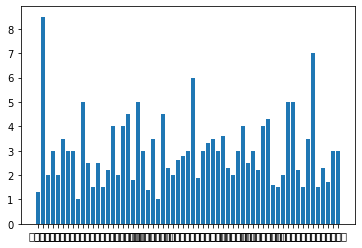

In [54]:
plt.bar(lp_df['시군구'],lp_df['period_year'])

#### 2. 날씨 data와 연계

In [21]:
species_list['고양이-코리아숏헤어']

,주소,축종,진단일,발생일,지역코드,사육수,location,date,avg_temperature(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%)
0,경기도 포천시 영북면 자일리,고양이-코리아숏헤어,20161231,20161226,98,14,동두천,20161226,1.5,0.0,0.9,74.6
1,경기도 포천시 영북면 자일리,고양이-코리아숏헤어,20170102,20161230,98,7,동두천,20161230,-4.3,0.0,0.9,54.4
